In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
data_2015 = pd.read_csv('G:\\내 드라이브\\노트북\\23-겨울\\빅데이터_미래사회\\data\\2015_직업분포.csv')
data_2015

,행정구역별,성별,연령별,2015,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2015.8,2015.9,2015.10
0,행정구역별,성별,연령별,취업 1인가구(15세 이상)-계,관리자,전문가 및 관련 종사자,사무 종사자,서비스 종사자,판매 종사자,농림어업 숙련 종사자,기능원 및 관련 기능 종사자,장치·기계조작 및 조립 종사자,단순 노무 종사자,기타
1,전국,계,합계,2874390,32226,582194,417392,375491,308812,143252,270414,326834,406343,11432
2,전국,계,65~69세,114719,533,5432,3586,16063,8745,22397,6733,8671,42559,NaN
3,전국,계,70세 이상,177334,284,4542,2525,10987,10356,72513,3361,4154,68612,NaN


In [4]:
data_2020 = pd.read_csv('G:\\내 드라이브\\노트북\\23-겨울\\빅데이터_미래사회\\data\\2020_직업분포.csv')
data_2020

,행정구역별,성별,연령별,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2020.10
0,행정구역별,성별,연령별,취업 1인가구(15세 이상)-계,관리자,전문가 및 관련 종사자,사무 종사자,서비스 종사자,판매 종사자,농림어업 숙련 종사자,기능원 및 관련 기능 종사자,장치·기계조작 및 조립 종사자,단순 노무 종사자,기타
1,전국,계,합계,4109902,26077,883897,786364,551463,400172,138491,366781,468436,468192,20029
2,전국,계,65~69세,181482,967,10377,13143,35079,14619,21505,13868,19513,52401,10
3,전국,계,70세 이상,212554,671,7182,8316,25922,13200,46579,7051,8618,95015,-


In [5]:
data_2015.columns = data_2015.iloc[0]
data_2015 = data_2015[1:]

data_2020.columns = data_2020.iloc[0]
data_2020 = data_2020[1:]

In [6]:
data_2015.drop(['행정구역별', '성별', '기타', '연령별', '취업 1인가구(15세 이상)-계'], axis = 1, inplace = True)
data_2020.drop(['행정구역별', '성별', '기타', '연령별', '취업 1인가구(15세 이상)-계'], axis = 1, inplace = True)

data_2015

C:\Users\Neverland\AppData\Local\Temp\ipykernel_30612\3743885758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2015.drop(['행정구역별', '성별', '기타', '연령별', '취업 1인가구(15세 이상)-계'], axis = 1, inplace = True)
C:\Users\Neverland\AppData\Local\Temp\ipykernel_30612\3743885758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020.drop(['행정구역별', '성별', '기타', '연령별', '취업 1인가구(15세 이상)-계'], axis = 1, inplace = True)


,관리자,전문가 및 관련 종사자,사무 종사자,서비스 종사자,판매 종사자,농림어업 숙련 종사자,기능원 및 관련 기능 종사자,장치·기계조작 및 조립 종사자,단순 노무 종사자
1,32226,582194,417392,375491,308812,143252,270414,326834,406343
2,533,5432,3586,16063,8745,22397,6733,8671,42559
3,284,4542,2525,10987,10356,72513,3361,4154,68612


In [7]:
data_2020

,관리자,전문가 및 관련 종사자,사무 종사자,서비스 종사자,판매 종사자,농림어업 숙련 종사자,기능원 및 관련 기능 종사자,장치·기계조작 및 조립 종사자,단순 노무 종사자
1,26077,883897,786364,551463,400172,138491,366781,468436,468192
2,967,10377,13143,35079,14619,21505,13868,19513,52401
3,671,7182,8316,25922,13200,46579,7051,8618,95015


In [8]:
data_2015 = data_2015.astype(int)
data_2020 = data_2020.astype(int)

In [9]:
# 2, 3번째 행을 합쳐서 4번째 행으로 만들기
new_row = data_2015.iloc[1:3].sum()

# DataFrame에 새로운 행 추가하고 2, 3번째 행 제거
data_2015 = pd.concat([data_2015, pd.DataFrame([new_row], columns=data_2015.columns)], ignore_index=True)
data_2015 = data_2015.drop([1, 2])

data_2015

,관리자,전문가 및 관련 종사자,사무 종사자,서비스 종사자,판매 종사자,농림어업 숙련 종사자,기능원 및 관련 기능 종사자,장치·기계조작 및 조립 종사자,단순 노무 종사자
0,32226,582194,417392,375491,308812,143252,270414,326834,406343
3,817,9974,6111,27050,19101,94910,10094,12825,111171


In [10]:
# 2, 3번째 행을 합쳐서 4번째 행으로 만들기
new_row = data_2020.iloc[1:3].sum()

# DataFrame에 새로운 행 추가하고 2, 3번째 행 제거
data_2020 = pd.concat([data_2020, pd.DataFrame([new_row], columns=data_2020.columns)], ignore_index=True)
data_2020 = data_2020.drop([1, 2])

data_2020

,관리자,전문가 및 관련 종사자,사무 종사자,서비스 종사자,판매 종사자,농림어업 숙련 종사자,기능원 및 관련 기능 종사자,장치·기계조작 및 조립 종사자,단순 노무 종사자
0,26077,883897,786364,551463,400172,138491,366781,468436,468192
3,1638,17559,21459,61001,27819,68084,20919,28131,147416


In [11]:
data_2015 = data_2015.drop([0])
data_2015 = data_2015.reset_index(drop=True)

data_2015

,관리자,전문가 및 관련 종사자,사무 종사자,서비스 종사자,판매 종사자,농림어업 숙련 종사자,기능원 및 관련 기능 종사자,장치·기계조작 및 조립 종사자,단순 노무 종사자
0,817,9974,6111,27050,19101,94910,10094,12825,111171


In [12]:
data_2020 = data_2020.drop([0])
data_2020 = data_2020.reset_index(drop=True)

data_2020

,관리자,전문가 및 관련 종사자,사무 종사자,서비스 종사자,판매 종사자,농림어업 숙련 종사자,기능원 및 관련 기능 종사자,장치·기계조작 및 조립 종사자,단순 노무 종사자
0,1638,17559,21459,61001,27819,68084,20919,28131,147416


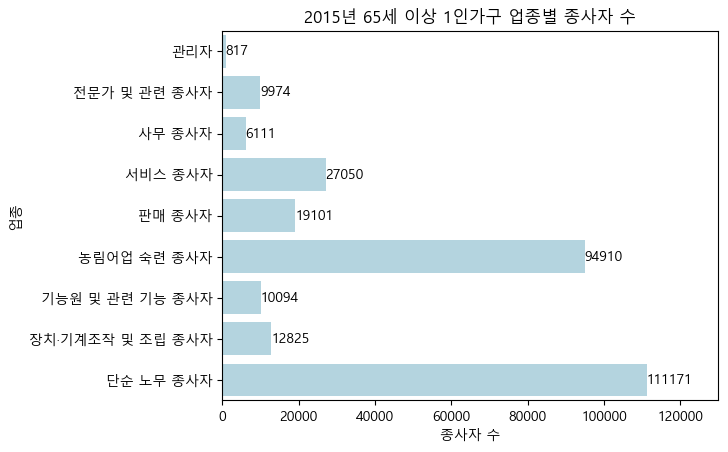

In [13]:
ax = sns.barplot(x=data_2015.iloc[0], y=data_2015.columns, color='lightblue')
for i, v in enumerate(data_2015.iloc[0]):
    ax.text(v, i, str(v), color='black', ha="left", va="center")

# x축 라벨 및 제목 설정
plt.xlabel('종사자 수')
plt.ylabel('업종')
plt.title('2015년 65세 이상 1인가구 업종별 종사자 수')
plt.xlim(0, 130000)

plt.show()

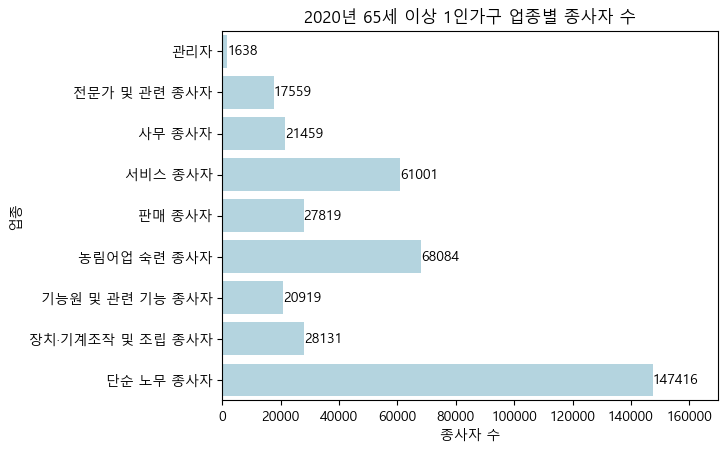

In [14]:
ax = sns.barplot(x=data_2020.iloc[0], y=data_2020.columns, color='lightblue')
for i, v in enumerate(data_2020.iloc[0]):
    ax.text(v, i, str(v), color='black', ha="left", va="center")

# x축 라벨 및 제목 설정
plt.xlabel('종사자 수')
plt.ylabel('업종')
plt.title('2020년 65세 이상 1인가구 업종별 종사자 수')
plt.xlim(0, 170000)

plt.show()

<Figure size 1000x600 with 0 Axes>

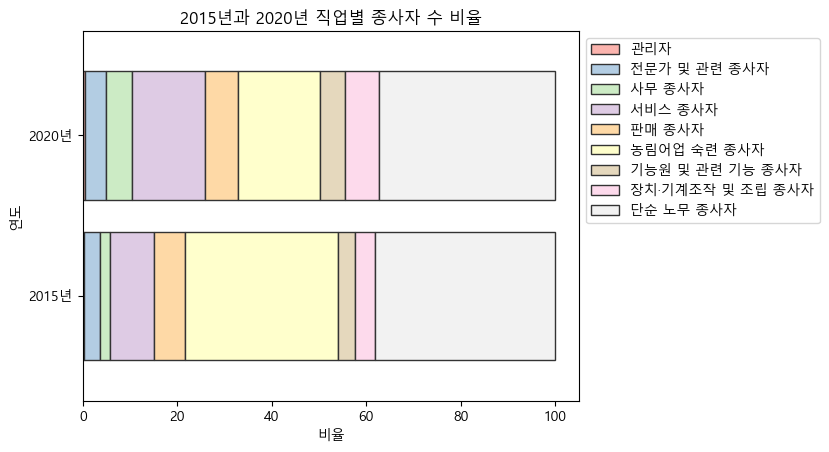

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터
data = {'년도': ['2015년', '2020년'],
        '관리자': [0.28, 0.42],
        '전문가 및 관련 종사자': [3.42, 4.46],
        '사무 종사자': [2.09, 5.45],
        '서비스 종사자': [9.26, 15.48],
        '판매 종사자': [6.54, 7.06],
        '농림어업 숙련 종사자': [32.50, 17.28],
        '기능원 및 관련 기능 종사자': [3.46, 5.31],
        '장치·기계조작 및 조립 종사자': [4.39, 7.14],
        '단순 노무 종사자': [38.07, 37.41]}

df = pd.DataFrame(data)

# '년도' 열을 index로, 업종을 columns로 변경
df.set_index('년도', inplace=True)

plt.figure(figsize=(10, 6))

# 가로로 누적 막대그래프
ax = df.plot(kind='barh', stacked=True, width=0.8, colormap='Pastel1', edgecolor=".2")

# cumulative_width = 0
# for p in ax.patches:
#     width = p.get_width()
#     plt.text(cumulative_width + width / 2, p.get_y() + p.get_height() / 2, f'{width:.1f}', 
#              ha='center', va='center', color='black', fontweight='bold')
#     if width < 10:
#         cumulative_width += width - 3  # 여백을 주어 숫자 간 간격을 조절합니다.
#     else:
#         cumulative_width += width


# y축 라벨 및 제목 설정
plt.ylabel('연도')
plt.xlabel('비율')
plt.title('2015년과 2020년 직업별 종사자 수 비율')

# 범례 위치 조정 (그래프 외부로 이동)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 그래프 출력
plt.show()
